<a href="https://colab.research.google.com/github/chaitu2568/DEEP-LEARNING/blob/master/MNIST_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision

     |████████████████████████████████| 2.0MB 4.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch 
from torchvision import datasets,transforms
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F

In [0]:
# Applying the transformations to the data
# 1->Numpy to Tensor(returns float values ranging from 0 to 1)
# 2->Normalising the values by setting mean=0.5 and sd=0.5 for ColorScale,Width and Height of Image (returns values ranging from (-1,1))

transforms=transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
# Datasets are taken from the MNIST dataset
train_data=datasets.MNIST(root='./imgdata',train=True,download=True,transform=transforms)
validation_data=datasets.MNIST(root='./imgdata',train=False,download=True,transform=transforms)
# laoding the datasets batch wise for each epoch
train_load=torch.utils.data.DataLoader(dataset=train_data,batch_size=100,shuffle=True) #to avoid the Local Minimum
validation_load=torch.utils.data.DataLoader(dataset=validation_data,batch_size=100,shuffle=False)

In [0]:
# Now to plot the graph covert back into Tensor

def img_convert(tensor):
#   first cloning and coverting into numpy array
  image=tensor.clone().detach().numpy()
#   changing dimensions from 1,28,28 to 28,28,1
  image=image.transpose(1,2,0)  
#   deNormalizing it by multiplying with sd and adding mean
  image=image*np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5))
#   changing the range from 0 to 1
  image=image.clip(0,1)
  return image

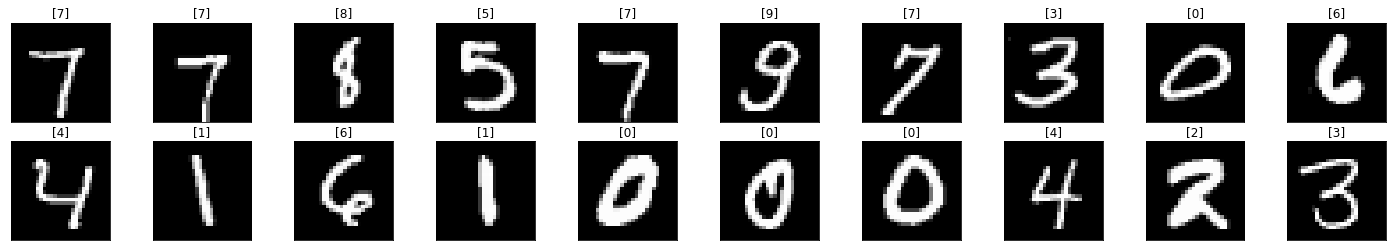

In [5]:

dataiter=iter(train_load)
images,labels = dataiter.next() #loads 100 batchsize of data for every iteration
main=plt.figure(figsize=(25,4))


for index in np.arange(20):
  ax=main.add_subplot(2,10,index+1,xticks=[], yticks=[])
  plt.imshow(img_convert(images[index]))
  ax.set_title([labels[index].item()])
  
  

In [0]:
class MultiClassifier(nn.Module):
  def __init__(self,data_in,H1,H2,data_out):
    super().__init__()
    self.linear1=nn.Linear(data_in,H1)
    self.linear2=nn.Linear(H1,H2)
    self.linear3=nn.Linear(H2,data_out)
  def forward(self,x):
    x=F.relu(self.linear1(x))
    x=F.relu(self.linear2(x))
    x=self.linear3(x)
    return x
  
    

In [0]:
obj=MultiClassifier(784,125,65,10)


In [0]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(obj.parameters(),lr=0.0001)

In [9]:
epochs=15

train_loss=[]
train_accuracy=[]
validation_loss=[]
validation_accuracy=[]
for ite in range(epochs):
  epoch_loss=0
  epoch_accuracy=0
  batch_loss=0
  batch_accuracy=0
  
#   validation constraints
  epoch_val_loss=0
  epoch_val_accuracy=0
  batch_val_accuracy=0
  batch_val_loss=0

  for images, labels in train_load:
    images=images.view(images.shape[0],-1)
    results=obj(images)
    loss=criterion(results,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    batch_loss+=loss.item() 
    _,preds=torch.max(results,1)
    batch_accuracy+=torch.sum(preds==labels.data)
    
    
  else:
    for val_img, val_lab in validation_load:
      val_img=val_img.view(val_img.shape[0],-1)
      val_results=obj(val_img)
      val_loss=criterion(val_results,val_lab)
      
      batch_val_loss+=val_loss.item() 
      _,val_preds=torch.max(val_results,1)
      batch_val_accuracy+=torch.sum(val_preds==val_lab.data)
    
      
      
    epoch_val_loss=batch_val_loss/len(validation_load)
    validation_loss.append(epoch_val_loss)
    epoch_val_accuracy=batch_val_accuracy.float()/len(validation_load)
    validation_accuracy.append(epoch_val_accuracy)
    
      
    epoch_loss=batch_loss/len(train_load)
    train_loss.append(epoch_loss)
    epoch_accuracy=batch_accuracy.float()/len(train_load)
    train_accuracy.append(epoch_accuracy)
    
    print('Present Epoch:',ite)
    print('Validation Loss: {:.4f}, Validation Accuracy: {:.4f}'.format(epoch_val_loss,epoch_val_accuracy.item()))
    print('Training Loss: {:.4f}, Training Accuracy: {:.4f}'.format(epoch_loss,epoch_accuracy.item()))
    

Present Epoch: 0
Validation Loss: 0.4212, Validation Accuracy: 88.8600
Training Loss: 0.9419, Training Accuracy: 78.1667
Present Epoch: 1
Validation Loss: 0.3190, Validation Accuracy: 90.8300
Training Loss: 0.3770, Training Accuracy: 89.4267
Present Epoch: 2
Validation Loss: 0.2867, Validation Accuracy: 91.7100
Training Loss: 0.3130, Training Accuracy: 91.0817
Present Epoch: 3
Validation Loss: 0.2542, Validation Accuracy: 92.6900
Training Loss: 0.2785, Training Accuracy: 91.9717
Present Epoch: 4
Validation Loss: 0.2328, Validation Accuracy: 93.4100
Training Loss: 0.2522, Training Accuracy: 92.7567
Present Epoch: 5
Validation Loss: 0.2148, Validation Accuracy: 93.6900
Training Loss: 0.2315, Training Accuracy: 93.3767
Present Epoch: 6
Validation Loss: 0.2011, Validation Accuracy: 94.0300
Training Loss: 0.2138, Training Accuracy: 93.9200
Present Epoch: 7
Validation Loss: 0.1838, Validation Accuracy: 94.5900
Training Loss: 0.1975, Training Accuracy: 94.3217
Present Epoch: 8
Validation Loss

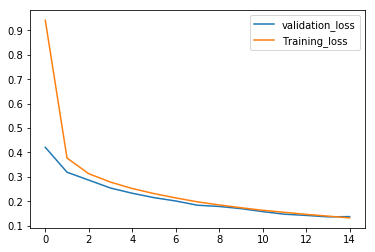

In [10]:
plt.plot(validation_loss,label='validation_loss')
plt.plot(train_loss,label='Training_loss')
plt.legend()

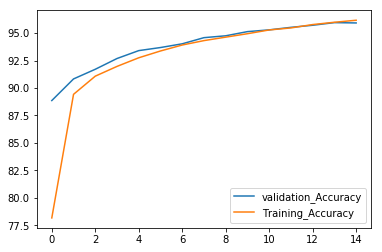

In [11]:
plt.plot(validation_accuracy,label='validation_Accuracy')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.legend()

In [19]:
print(type(validation_load))

<class 'torch.utils.data.dataloader.DataLoader'>


In [0]:
import PIL.ImageOps

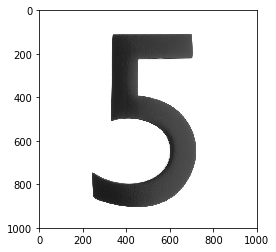

In [14]:
import requests
from PIL import Image

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

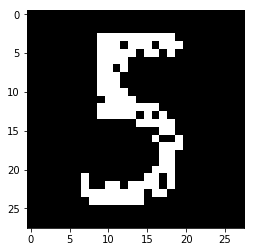

In [15]:
# data preprocessing 
# 1->Invert the colors of the image
img=PIL.ImageOps.invert(img)
# convert the image into binary color (0,1)
img=img.convert('1')
img=transforms(img)
plt.imshow(img_convert(img))


In [26]:
img=img.view(img.shape[0],-1)
result=obj(img)
_,preds=torch.max(result,1)
print(preds.item())

5


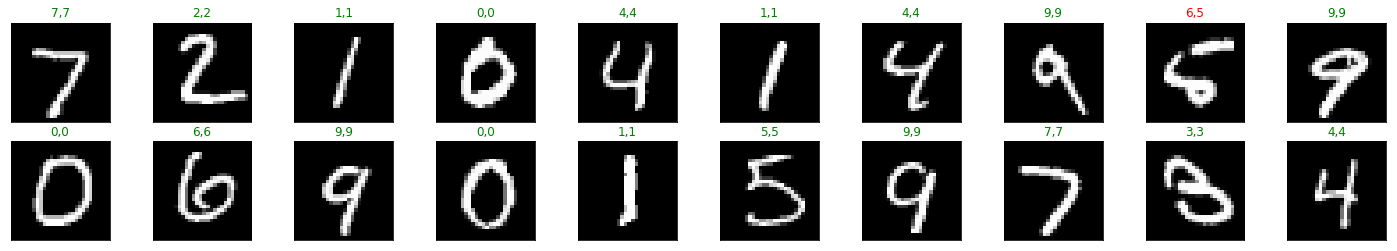

In [31]:
dataiter=iter(validation_load)
images,labels = dataiter.next() #loads 100 batchsize of data for every iteration
images_=images.view(images.shape[0],-1)
results=obj(images_)
_,predics=torch.max(results,1)
main=plt.figure(figsize=(25,4))
for index in np.arange(20):
  ax=main.add_subplot(2,10,index+1,xticks=[], yticks=[])
  plt.imshow(img_convert(images[index]))
  ax.set_title('{},{}'.format(str(predics[index].item()),str(labels[index].item())),color=('green'if predics[index]==labels[index] else 'red'))

In [0]:
# dataiter = iter(validation_load)
# images, labels = dataiter.next()
# images_ = images.view(images.shape[0], -1)
# output = obj(images_)
# _, preds = torch.max(output, 1)

# fig = plt.figure(figsize=(25, 4))

# for idx in np.arange(20):
#   ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
#   plt.imshow(img_convert(images[idx]))
#   ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))